### Un excellent graphique est celui qui donne au spectateur le plus grand nombre d'idées avec le moins d'encre possible, dans le plus petit espace. 
Edward R. Tufte, Professeur de statistiques à l’université de Yale

En datascience, il existe plusieurs bibliothèques pour afficher des graphiques :
- matplotlib
- pandas : pandas utiliser une version trop simplifiée de matplotlib (à éviter si possible)
- seaborn : une version améliorée de matplotlib

Dans le cadre de ce TP nous allons utiliser seaborn. Pourquoi ? L'outil offre plus de graphiques comparé à matplotlib et des designs plus élégants. Toutefois, pour utiliser seaborn, il faudra utiliser (et importer) matplotlib pour afficher nos graphiques. Notez qu'il existe également yellowbrick ou encore bokeh pour gérer les graphiques avec plus d'interactions ou encore plus de type de graphiques.

- [Voir un ensemble d'exemples avec code (en anglais)](https://www.python-graph-gallery.com/all-charts/)

Et pour tester ce nouvel outil, nous allons réutiliser notre DataFrame des naissances par département. Malgré son petit nombre de colonnes, il est possible de s'essayer avec plein de types de graphiques.

**Cette phase de construction de graphiques s'installe aussi bien dans phase d'exploration ou encore d'évaluation/interprétation.**

# Pour les utilisateurs de Google colab

Petit apparté pour les utilisateurs de google colab. Pour utiliser la méthode `pd.read_csv()`, il faudra rajouter quelques lignes de codes supplémentaires pour pouvoir charger un fichier, les voici.


```python
# Première cellule jupyter
from google.colab import files
uploaded = files.upload()
```

```python
# Seconde cellule jupyter
import io
# Très important : le nom du fichier passé en paramètre de la fonction "uploaded" doit avoir le même nom que le fichier que vous avez uploadé
df = pd.read_csv(io.BytesIO(uploaded['nom-du-fichier-uploader.csv']))
```

- [Voir plus  d'informations sur le chargement de fichiers externes avec Google colab](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)

In [144]:
# On importe seaborn et matplotlib vu que nous allons l'utiliser
import seaborn as sns
import matplotlib.pyplot as plt

# Et on importe toujours pandas et numpy
import pandas as pd
import numpy as np

import math

# Le fichier étant contenu dans un fichier zip, nous allons désarchiver le tout avec python
# On import donc la bibliothèque zipfile
import zipfile

chemin_zip = "data/naissances-par-departement-1900-2019.zip"
with zipfile.ZipFile(chemin_zip, 'r') as zip_ref:
    zip_ref.extractall("data/")

# le fichier est chargé et devient DataFrame
liste_prenoms_source = pd.read_csv("data/_tmp-naissances-par-departement-1900-2019.csv", sep=";") 

display(liste_prenoms_source.head())
display(liste_prenoms_source.dtypes)

   sexe        preusuel annais dpt  nombre
0     1  _PRENOMS_RARES   1900  02       7
1     1  _PRENOMS_RARES   1900  04       9
2     1  _PRENOMS_RARES   1900  05       8
3     1  _PRENOMS_RARES   1900  06      23
4     1  _PRENOMS_RARES   1900  07       9
sexe         int64
preusuel    object
annais      object
dpt         object
nombre       int64
dtype: object


In [16]:
liste_prenoms_nettoyage = liste_prenoms_source.copy()
# Nettoyage de notre dataset

# On supprime les colonnes avec les lignes ayant des données manquantes
liste_prenoms_nettoyage.dropna(inplace = True) 

# On supprime les lignes avec la valeur "_PRENOMS_RARES" pour la colonne "preusuel" ou
# XXXX comme valeur pour l'année ou 
# XX comme valeur pour le département
liste_prenoms_nettoyage = liste_prenoms_source[
       (liste_prenoms_source["preusuel"] != "_PRENOMS_RARES") &
        (liste_prenoms_source["annais"] != "XXXX") &
    (liste_prenoms_source["dpt"] != "XX")
]
# Il est tout à fait possible de nettoyer d'une autre façon, nous aurions pu, par exemple, remplacer 
# les années XXXX par une année définie si avoir des données faussées, ne vous dérange pas. 

new_liste_prenoms = liste_prenoms_nettoyage.copy()

new_liste_prenoms

,sexe,preusuel,annais,dpt,nombre,date_annnee
10784,1,AADIL,1983,84,3,1983-01-01
10785,1,AADIL,1992,92,3,1992-01-01
10787,1,AAHIL,2016,95,3,2016-01-01
10790,1,AARON,1962,75,3,1962-01-01
10791,1,AARON,1976,75,3,1976-01-01
...,...,...,...,...,...,...
3676674,2,ZYA,2013,44,4,2013-01-01
3676675,2,ZYA,2013,59,3,2013-01-01
3676676,2,ZYA,2017,974,3,2017-01-01
3676677,2,ZYA,2018,59,3,2018-01-01


# Ligne (line chart)

Assurément l'un des graphiques les plus simples, la ligne permet soit d'afficher la corrélation entre données (une données est exprimée sur l'axe X, et l'autre sur l'axe Y) ou l'évolution d'une donnée au fil du temps. Par ailleurs, notez qu'il est possible d'avoir plusieurs axe Y ou X, mais faites attention à la lisibilité.

Text(0.5, 1.0, 'Evolution des naissances des prénoms AGATHE, MATHILDE de 1900 à 2019')

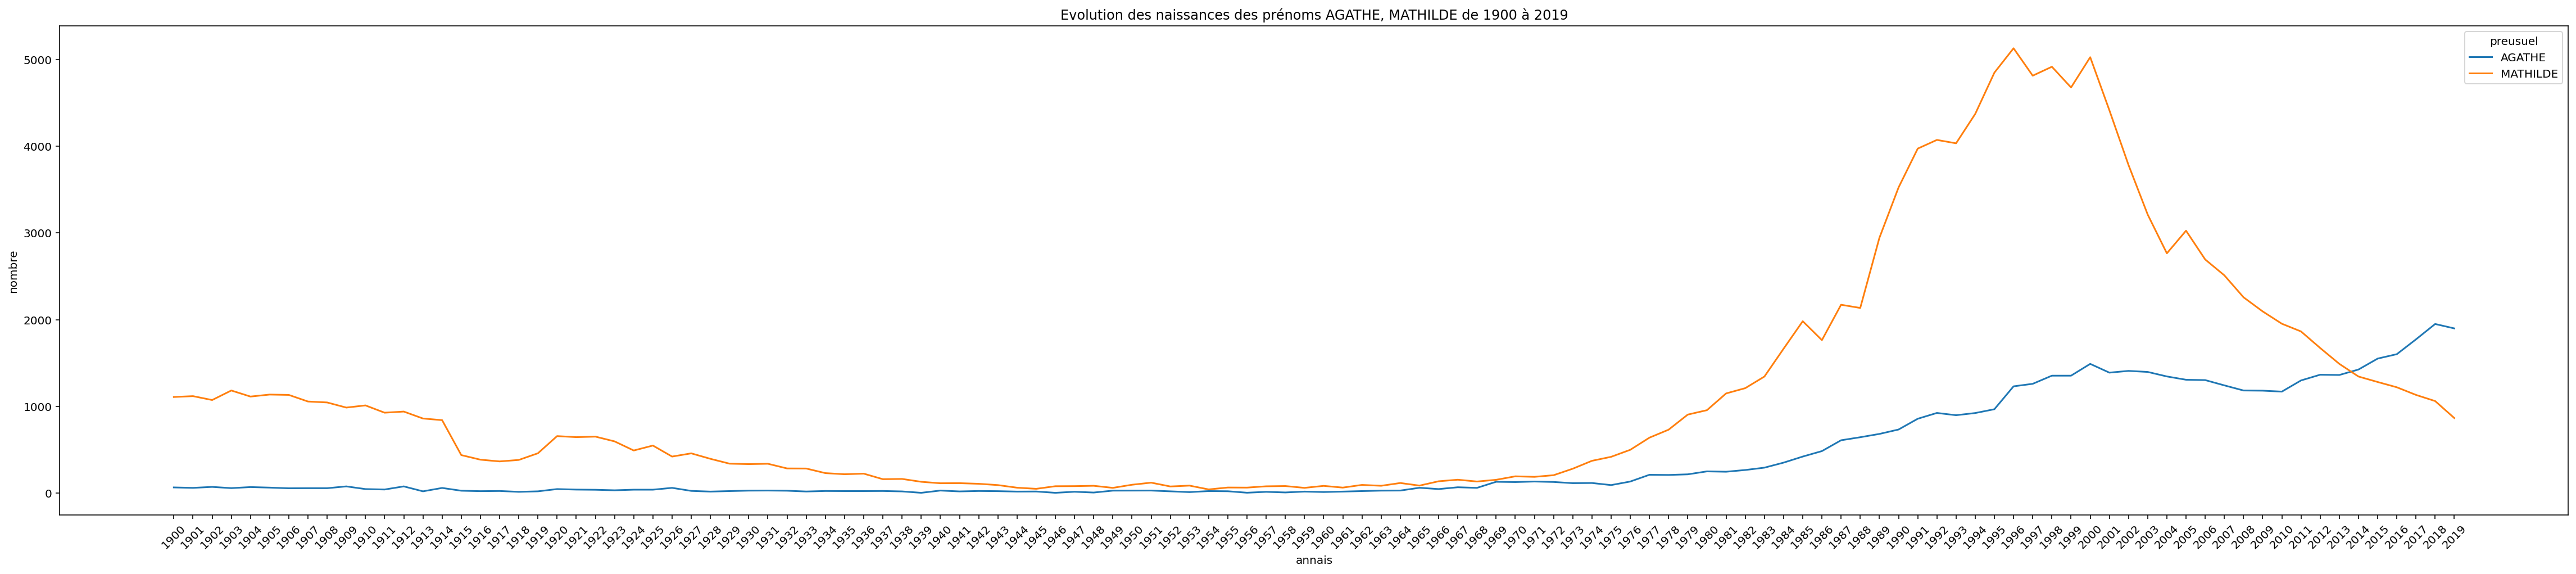

In [3]:
# Pour commencer, nous allons afficher l'évolution du nombre de naissances de prénoms

# Vous pouvez remplacer d'autres prénoms si vous le souhaitez
# La méthode ".str.upper()" permet de forcer la casse en majuscule
liste_prenoms = pd.Series(["agathe", 'mathilde']).str.upper() 

un_prenom_df = new_liste_prenoms[
    (liste_prenoms_nettoyage["preusuel"].isin(liste_prenoms))
].sort_values(by=['annais'])

un_prenom_df = un_prenom_df.groupby(['annais','preusuel'], as_index=False).agg({'nombre': 'sum'})

plt.figure(figsize=(40, 8), dpi=144)
ligne_graph = sns.lineplot(
        x="annais", # Définit la valeur de la l'axe X 
        y="nombre", # Définit la valeur de la l'axe Y
        hue="preusuel", # Définit la colonne qui va être comparée
        data=un_prenom_df # Définit le dataset
)
plt.xticks(rotation=45)
ligne_graph.set_title(f'Evolution des naissances des prénoms {", ".join(liste_prenoms)} de 1900 à 2019')

Vous remarquez que malgré l'affichage d'un graphique, il est relativement compliqué de le lire, nous avons beaucoup de données, effectivement nous pouvons double-cliquer sur notre graphique pour le voir en détails, et même avec ça, lorsque nous nous déplaçons, l'axe des ordonnées disparaît ce qui rend la lecture de notre graphique compliquée. C'est là qu'entre en jeu la librairie "ipympl", elle permet de rajouter de l'interaction aux graphiques de matplotlib.
D'ailleurs "ipympl" est la contraction de "**I**nteractive **Py**thon **M**at**p**lot**l**ib". ipympl n'étant pas natif à Jupyter, nous allons l'installer grâce à pip. Il vous suffit s'exécuter la ligne suivante

In [4]:
# le point d'exclamation indique que nous exécutons une commande de terminal (décommenter la ligne suivante)
# !pip install ipympl

# On active en global ipympl  (décommenter la ligne suivante)
# %matplotlib widget

# Notez que dans un vrai projet, ces deux lignes sont parmi les premières de notre notebook

Text(0.5, 1.0, 'Evolution des naissances des prénoms AGATHE, MATHILDE')

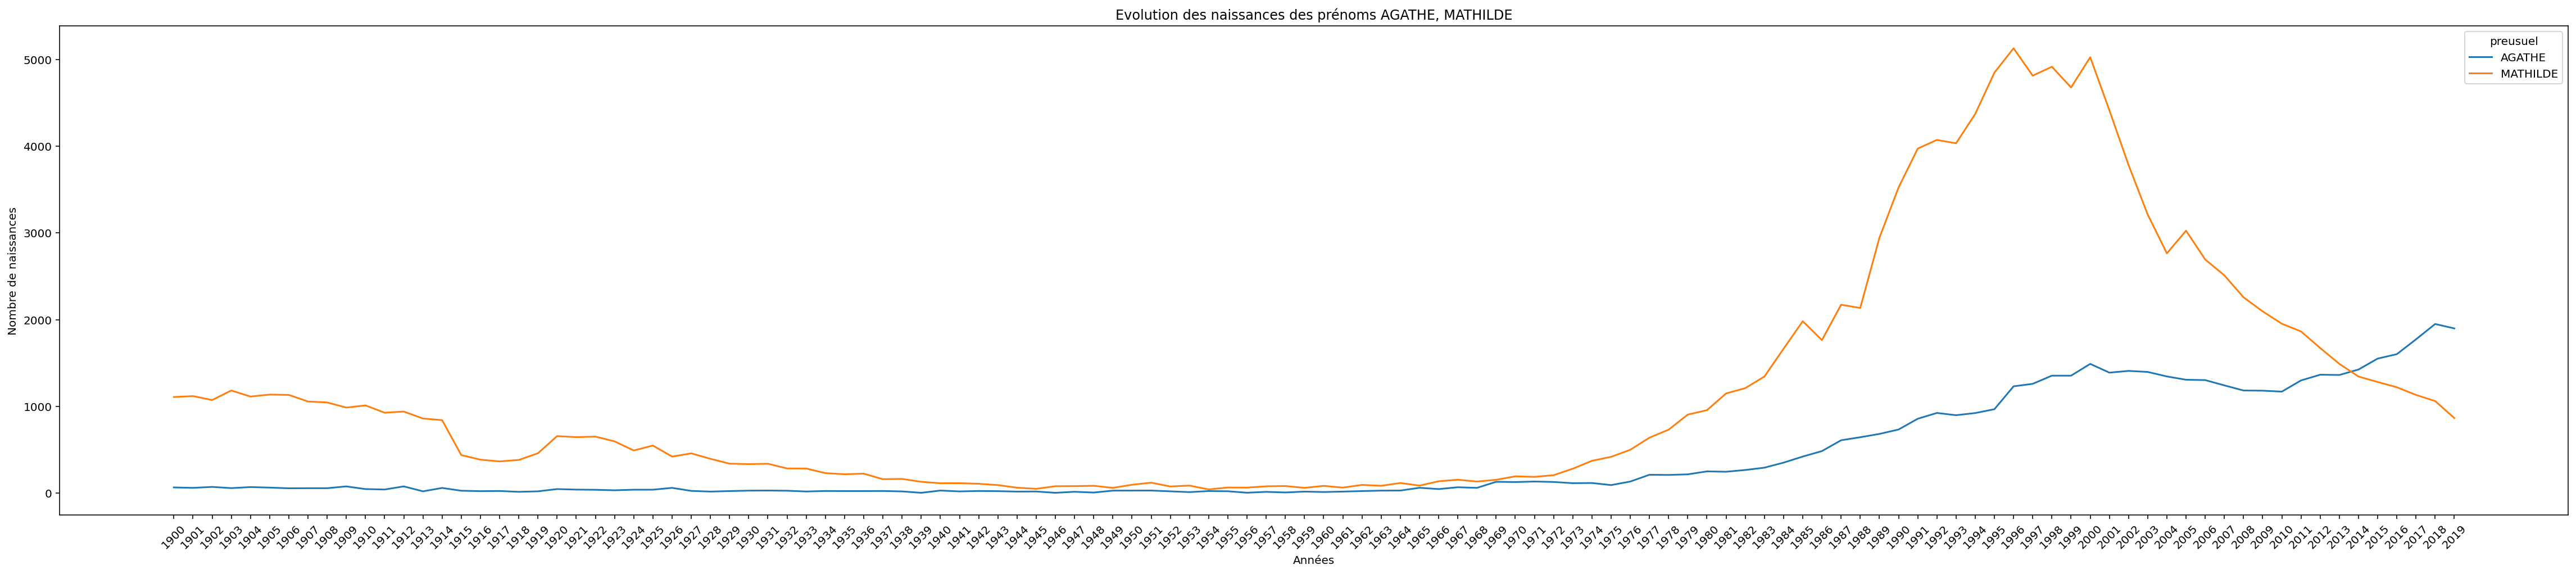

In [5]:
# Réaffichons notre graphique, nous remarquerez le code n'a pas changé. 
# Toutefois notre graphique ne s'affiche pas de la même façon

liste_prenoms = pd.Series(["agathe", 'mathilde']).str.upper()

prenoms_df = new_liste_prenoms[
    (liste_prenoms_nettoyage["preusuel"].isin(liste_prenoms))
].sort_values(by=['annais'])

un_prenom_df = prenoms_df.groupby(['annais','preusuel'], as_index=False).agg({'nombre': 'sum'})

plt.figure(
    figsize=(40, 8), 
    dpi=144
)
ax = sns.lineplot(
        x="annais", # Définit la valeur de la l'axe X 
        y="nombre", # Définit la valeur de la l'axe Y
        hue="preusuel", # Définit la colonne qui va être comparée
        data=un_prenom_df # Définit le dataset
)

plt.xticks(rotation=45)
ax.set(xlabel='Années', ylabel='Nombre de naissances')
ax.set_title(f'Evolution des naissances des prénoms {", ".join(liste_prenoms)}')

D'après vous, quelles soluations aurions-nous pu appliquer pour rendre notre données visibles avec un graphique de type ligne ?

# Barres (bar chart)

Le diagramme en barres est idéal pour comparer des données. Ce type de graphique peut, parfois, se substituer au diagramme en ligne. Le diagramme en barres existe sous quatre formes :
- Diagramme en barres (position horizontale)
- Diagramme en colonnes (position verticale)
- Diagramme en barres empilées (position horizontale)
- Diagramme en colonnes empilées (position verticale)

Text(0.5, 1.0, 'Evolution des naissances des prénoms AGATHE, MATHILDE de 1900 à 2019')

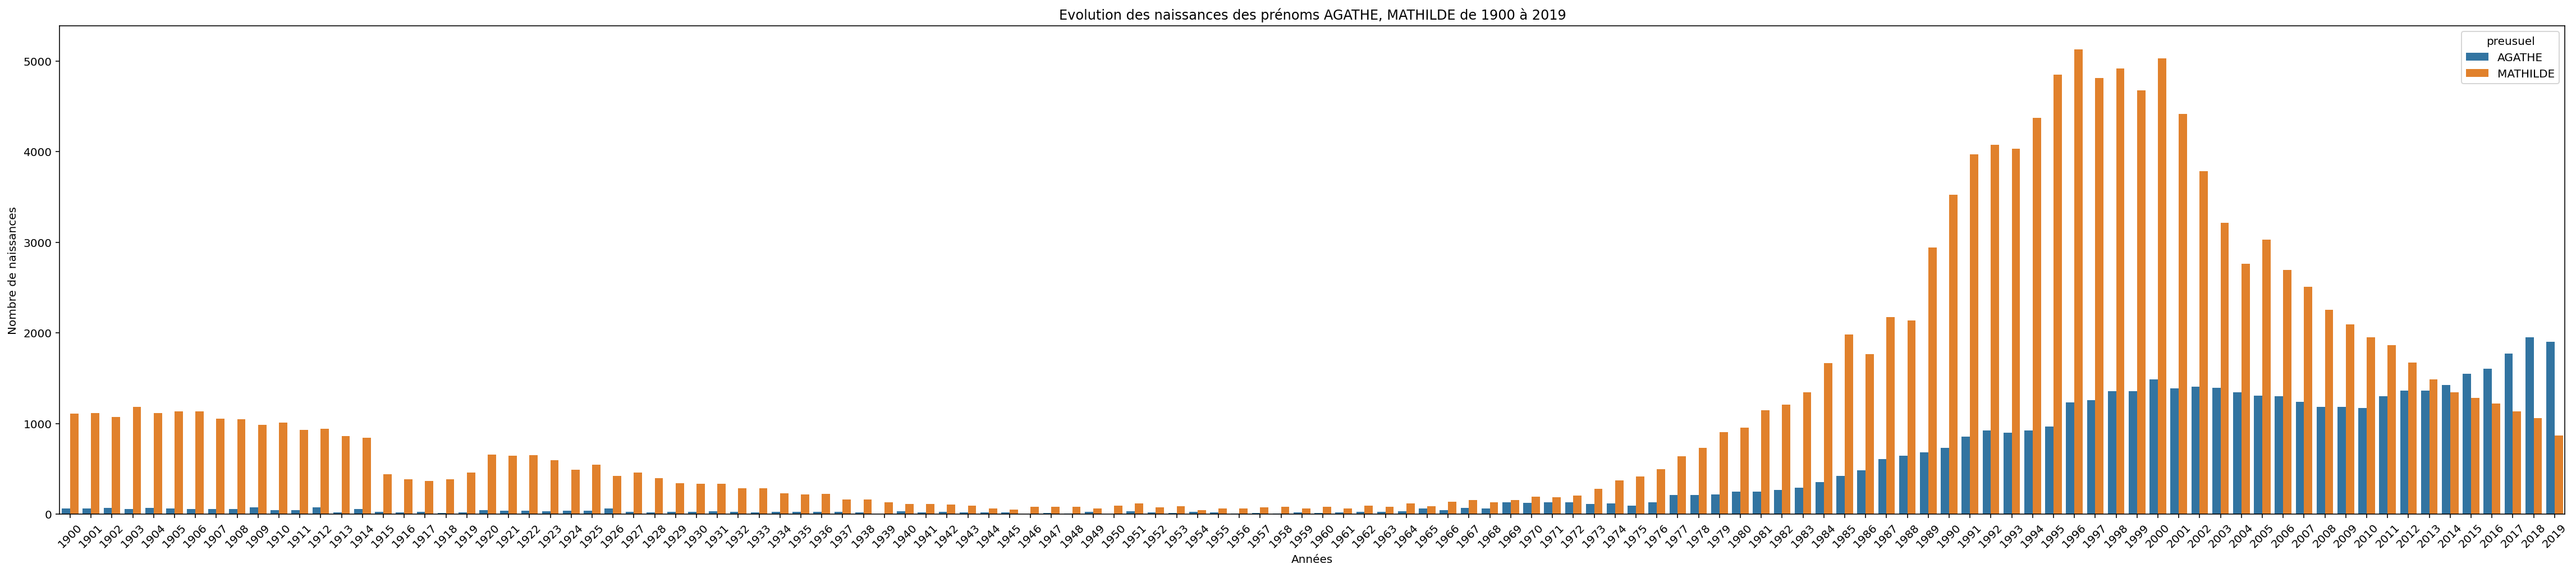

In [23]:
liste_prenoms = pd.Series(["agathe", 'mathilde']).str.upper()

prenoms_df = new_liste_prenoms[
    (liste_prenoms_nettoyage["preusuel"].isin(liste_prenoms))
].sort_values(by=['annais'])

un_prenom_df = prenoms_df.groupby(['annais','preusuel'], as_index=False).agg({'nombre': 'sum'})

plt.figure(figsize=(40, 8), dpi=144)
ax = sns.barplot(
        x="annais", # Définit la valeur de la l'axe X 
        y="nombre", # Définit la valeur de la l'axe Y
        hue="preusuel", # Définit la colonne qui va être comparée
        data=un_prenom_df # Définit le dataset
)


plt.xticks(rotation=45)
ax.set(xlabel='Années', ylabel='Nombre de naissances')
ax.set_title(f'Evolution des naissances des prénoms {", ".join(liste_prenoms)} de {prenoms_df["annais"].min()} à {prenoms_df["annais"].max()}')

## Enregistrer son graphique

Pour rappel, matplotlib nous permet d'enregistrer nos graphiques dans un fichier jpg, png, pdf, eps ou svg grâce à la méthode `savefig`. Elle s'utilise la façon suivante.
```python
plt.savefig('nom-du-fichier') # par défault le fichier est au format ".png", mais on peut rajouter une des extensions listée plus haut
```

**Essayez sur le graphique plus haut.**

Note : les formats pdf, eps et svg sont vectoriels, autrement dit, les images générées peuvent être zoomées à l'infini

- [Voir documentation officielle de la méthode .savefig](https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.savefig)

## Vues multiples

Avec ipympl, nous avons l'interaction sur nos graphiques, oui. Toutefois, si on sauvegarde de nos graphiques, nous perdons l'interaction sur les fichiers, c'est pourquoi il est parfois préférable de définir des graphiques à vues multiples pour vendre nos données plus claires. Ceci est possible avec matplotlib grâce à la méthode `subplots()`, soit "sous graphiques" en français.

Nous allons donc reprendre notre graphique précédent mais de découper en plusieurs parties. Pour ce faire, nous allons donc séparer notre DataFrame en plusieurs parties grâce à la méthode `cut()` de pandas. 

In [210]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

annais                object
preusuel              object
nombre                 int64
intervalle_annee    category
dtype: object

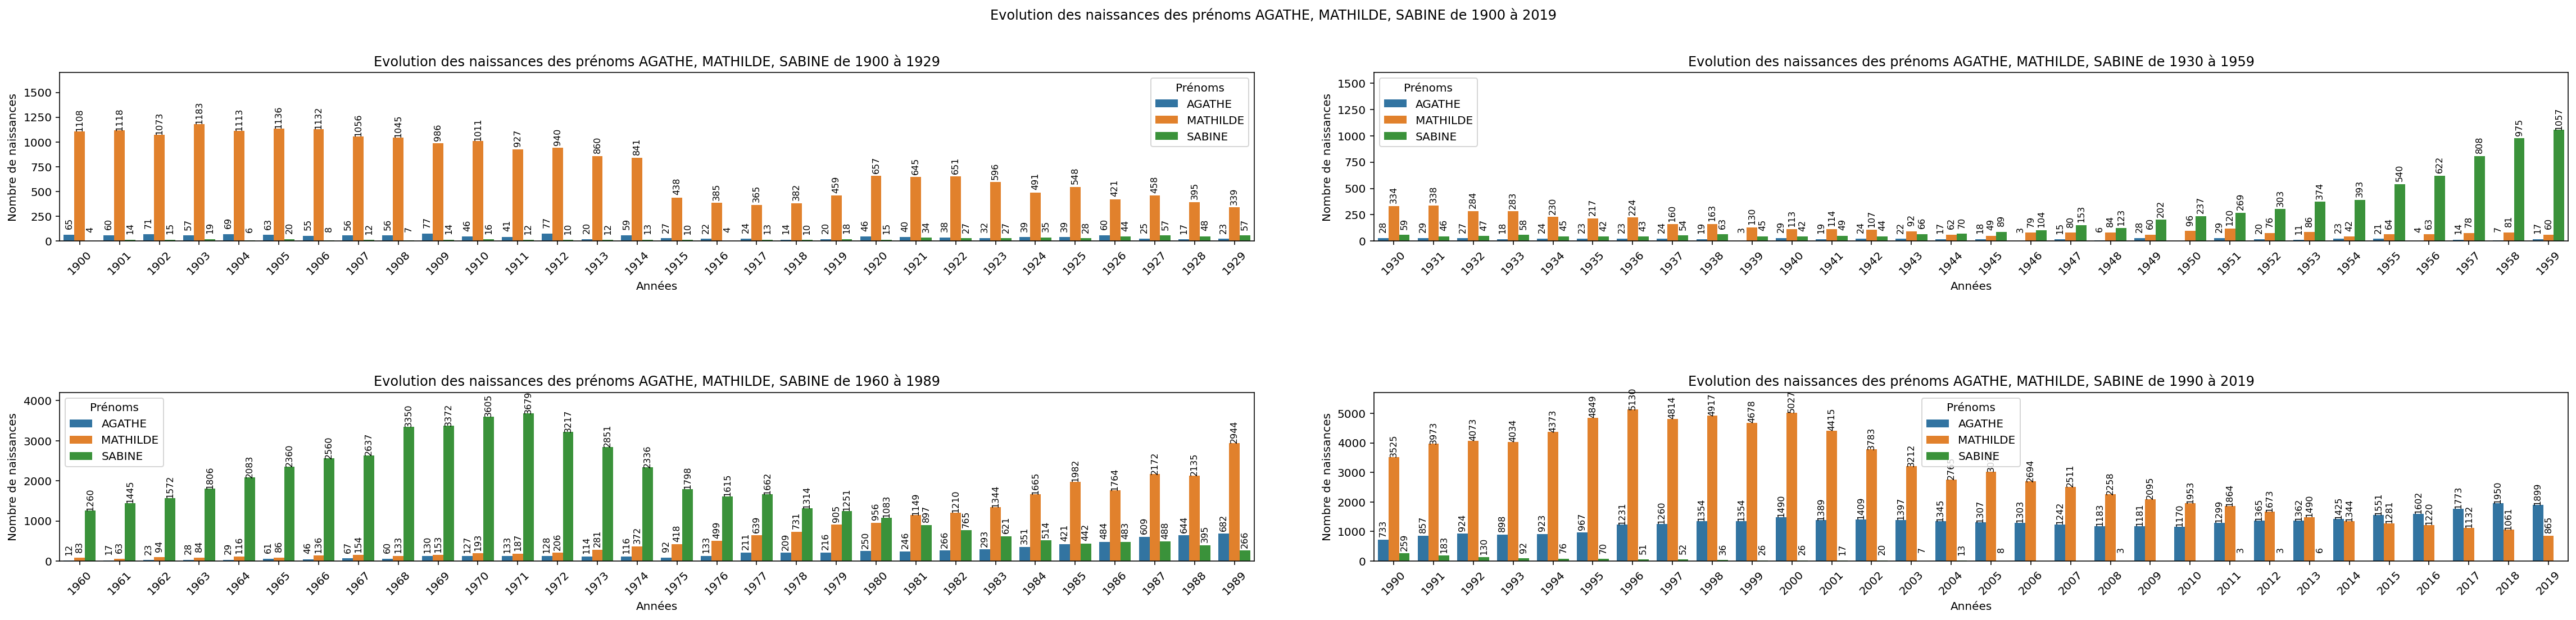

In [252]:
# On définit une grille de deux lignes et deux colonnes
# X|X
# X|X
# la méthode `subplots()` retourne deux variables :
# - fig : figure, ça représente le conteneur de nos graphiques 
# - liste_axes : axes représente chaque graphique

# - documentation : https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=subplots#matplotlib.pyplot.subplots
fig, liste_axes = plt.subplots(nrows = 2, ncols = 2, figsize=(40, 8), dpi=144)

# Notre variable "axes" contient quatre graphiques vides
# - En haut à gauche : axes[0, 0]
# - En haut à droite : axes[0, 1]
# - En bas à gauche : axes[1, 0]
# - En bas à droite : axes[1, 1]

# Vous remarquez que le tout est stocké sous forme de tableau, 
# il faudra donc utiliser les indexes pour accéder à chaque sous-graphique 

liste_prenoms = pd.Series(["agathe", 'mathilde', "sabine"]).str.upper() # 

prenoms_df = new_liste_prenoms[
    (new_liste_prenoms["preusuel"].isin(liste_prenoms))
].sort_values(by=['annais'])

grp_prenoms_df = prenoms_df.copy()
grp_prenoms_df = prenoms_df.groupby(by=['annais', 'preusuel'], as_index=False).agg({'nombre': 'sum'})

# On rajoute une nouvelle colonne "date_annnee" de type date, 
# ceci va nous permettre de créer des intervalles temporaires
grp_prenoms_df["date_annnee"] = pd.to_datetime(
    grp_prenoms_df['annais'], format='%Y'
)

# On découpe en plusieurs parties notre DataFrame, 
# on le découpe en 4 car on a défini 4 sous-graphiques plus haut
grp_prenoms_df['intervalle_annee'] = pd.cut(
    grp_prenoms_df['date_annnee'], 4
)
grp_prenoms_df.drop(columns=['date_annnee'], inplace=True)
#grp_prenoms_df.set_index('annais', inplace=True)

display(grp_prenoms_df.dtypes)

for i, intervalle in enumerate(grp_prenoms_df['intervalle_annee'].unique()):
    axe = liste_axes.flatten()[i]
    data = grp_prenoms_df[grp_prenoms_df['intervalle_annee'] == intervalle]
    max_nombre = data['nombre'].max()
    centaine_proche = math.ceil(max_nombre / 100) * 100

    bar_graph = sns.barplot(
        ax = axe, # Définit le graphique qui va recevoir notre graphique
        x = "annais", # Définit la valeur de la l'axe X 
        y = "nombre", # Définit la valeur de la l'axe Y
        hue = "preusuel", # Définit la colonne qui va être comparée
        data = data, # Définit le dataset
    )
    axe.set_ylim([0, centaine_proche + 500])

    for p in axe.patches:
        valeur = p.get_height()
        axe.annotate(
            text = 0 if math.isnan(valeur) else int(valeur), 
            xy = (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', 
            va='center', 
            fontsize=8, 
            color='black', 
            xytext=(0, 10),
            textcoords='offset points',
            rotation=90
         )
        #change_width(axe, .4)

    axe.legend(title="Prénoms");
    axe.set(xlabel='Années', ylabel='Nombre de naissances')
    axe.tick_params('x', labelrotation=45)
    axe.set_title(f'Evolution des naissances des prénoms {", ".join(liste_prenoms)} de {data["annais"].min()} à {data["annais"].max()}')

fig.suptitle(f'Evolution des naissances des prénoms {", ".join(liste_prenoms)} de {grp_prenoms_df["annais"].min()} à {grp_prenoms_df["annais"].max()}')

plt.subplots_adjust(
    hspace = 0.9, # Espace en hauteur (margin-top/bottom en CSS) 
    wspace = 0.1 # Espace en largeur (margin-left/right en CSS)
)

Notez qu'il est également possible de mélanger le type de graphiques au sein du même dataset.

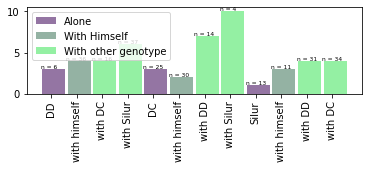

In [167]:
# Create bars
barWidth = 0.9
bars1 = [3, 3, 1]
bars2 = [4, 2, 3]
bars3 = [4, 6, 7, 10, 4, 4]
bars4 = bars1 + bars2 + bars3
 
# The X position of bars
r1 = [1,5,9]
r2 = [2,6,10]
r3 = [3,4,7,8,11,12]
r4 = r1 + r2 + r3
 
# Create barplot
plt.bar(r1, bars1, width = barWidth, color = (0.3,0.1,0.4,0.6), label='Alone')
plt.bar(r2, bars2, width = barWidth, color = (0.3,0.5,0.4,0.6), label='With Himself')
plt.bar(r3, bars3, width = barWidth, color = (0.3,0.9,0.4,0.6), label='With other genotype')
# Note: the barplot could be created easily. See the barplot section for other examples.
 
# Create legend
plt.legend()
 
# Text below each barplot with a rotation at 90°
plt.xticks([r + barWidth for r in range(len(r4))], ['DD', 'with himself', 'with DC', 'with Silur', 'DC', 'with himself', 'with DD', 'with Silur', 'Silur', 'with himself', 'with DD', 'with DC'], rotation=90)
 
# Create labels
label = ['n = 6', 'n = 25', 'n = 13', 'n = 36', 'n = 30', 'n = 11', 'n = 16', 'n = 37', 'n = 14', 'n = 4', 'n = 31', 'n = 34']
 
# Text on the top of each bar
for i in range(len(r4)):
    plt.text(x = r4[i]-0.5 , y = bars4[i]+0.1, s = label[i], size = 6)

# Adjust the margins
plt.subplots_adjust(bottom= 0.2, top = 0.5)
 
# Show graphic
plt.show()